In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
14,2250,3,101.00
1,2600,4,120.00
0,1056,2,39.07
15,1175,2,42.00
17,1540,3,60.00


In [9]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [12]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [11]:
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b
np.square(a-b)
np.mean(np.square(a-b))

35.333333333333336

In [15]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w,scaled_X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w,b,cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ),500)
w,b,cost    


(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

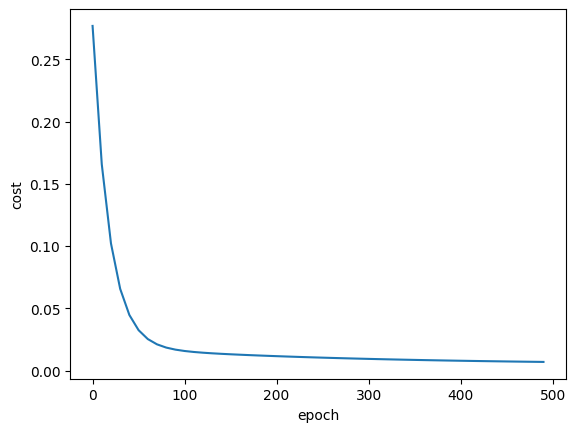

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [18]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [19]:
predict(1000,2,w,b)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [51]:
import random
random.randint(0,6)

3

In [54]:
def stochastic_gradient_descent(X,y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ),10000)
w_sgd,b_sgd,cost_sgd    

        

(array([0.71067523, 0.67617965]), -0.23368482853388942, 0.0014043093146172859)

In [55]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

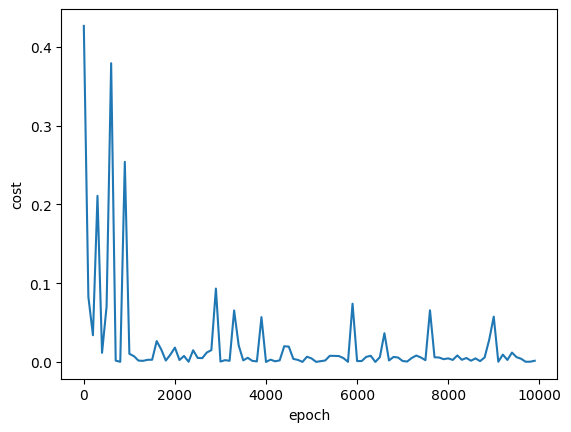

In [56]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [57]:
predict(2600,4,w_sgd,b_sgd)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.46542075440607

In [58]:
predict(1000,2,w_sgd,b_sgd)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.89024279094704

In [60]:
predict(1500,3,w_sgd,b_sgd)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.25288460332285